# COGS 108 Final Project Group 57: Did COVID-19 impact suicide rates?

Link to our presentation of the project: https://youtu.be/TvuNJoS5qag 

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X ] YES - make available
* [  ] NO - keep private

# Overview

The goal of our project was to find out if there is any correlation between the extensive Covid-19 lockdowns across the United States and suicide rates in those states. We cleaned data on suicide rates (extending as far back as 2005) and data regarding the pandemic in the United States. We then plotted the data using barplots, regression plots, and choropleth maps to better understand it. And, finally we produced a linear regression model in order to answer our question. 

What we found was that there was a negative correlation between lockdown days and suicide rates.

# Names

- Kyle Batalla
- Ken Nguyen
- Brian Chu
- Ishika Rathi

<a id='research_question'></a>
# Research Question

Did COVID-19 impact rates of suicide within the United States, and if it did, is there any correlation between the length of lockdowns in different states and suicide rates?

<a id='background'></a>

## Background & Prior Work

Our group initially set out to find a correlation between Covid-19 rates and a rise in mental health issues in the United States. Our reasoning behind posing such a question was that the extended period away from normalcy--with a lack of daily social interactions--may allow for an uptick in mental health issues. Unfortunately, we were unable to find adequate data to support us in answering this question; so, we revised our question to: "Has the extended Covid-19 lockdown lead to higher rates of suicide?". 

We wanted to limit our dataset to solely the United States for two primary reasons:
1. Firstly, it is of particular interest to us as we all experienced the pandemic in the United States, so we knew the breadth of the policies enacted during that time. This makes it easier for us to explain the numbers, graphs, and models that appear later in the project. 
    
2. Secondly, we felt that since we weren't informed on the policies and duration of the lockdown in other parts of the world, it would be difficult for us to contextualize data from other regions. Factors such as stricter lockdown policies and prior social unrest may influence the data in a way we were unaware of. 

During our researching and planning phase we uncovered numerous articles, datasets, and projects answering similar questions to ours, albeit from the perspective of other countries. We found datasets for countries such as Canada, Japan and Korea, and even some global datasets. Very little datasets were found in the way of the United States. 

---
References for articles and videos that inspired our question:
- 1) https://www.kff.org/coronavirus-covid-19/issue-brief/the-implications-of-covid-19-for-mental-health-and-substance-use/#:~:text=During%20the%20COVID%2D19%20pandemic,largely%20stable%20since%20spring%202020.
- 2) https://www.brookings.edu/blog/up-front/2022/04/08/how-did-covid-19-affect-americans-well-being-and-mental-health/
- 3) https://www.youtube.com/watch?v=fLYiMzpSgqI&ab_channel=PBSNewsHour
- 4) https://www.youtube.com/watch?v=KIOXEeD7CRQ&ab_channel=PBSNewsHour

References for our dataset:
- 1) https://www.cdc.gov/nchs/pressroom/sosmap/suicide-mortality/suicide.htm
- 2) https://data.humdata.org/dataset/nyt-covid-19-data?
- 3) https://ballotpedia.org/States_that_issued_lockdown_and_stay-at-home_orders_in_response_to_the_coronavirus_(COVID-19)_pandemic,_2020

# Hypothesis


We hypothesize that there is a positive correlation between suicide rates and states with longer lockdowns, more COVID-19 cases, and more COVID-19 related deaths.

We hypothesize this because we believe that living through the COVID-19 pandemic may have placed a heavy strain on many people's mental healths.  

# Dataset(s)

The datasets are sorted by states.

<br>

1. Dataset 1: Suicide mortality by state
<br>
* 400 Rows of observations
<br>
* 353233 total suicides observed
<br>
* suicide_rates.csv contains suicide mortality rates from 2014-2020 in the US organized by states
<br>
* Source: https://www.cdc.gov/nchs/pressroom/sosmap/suicide-mortality/suicide.htm


2. Dataset 2: US-States data of covid deaths, cases, and lockdown lengths per state
* 16734 Rows of observations
<br>
* us-states.csv contains recorded number of covid cases, covid related deaths, and lockdown lengths by state. First source is main dataset, with second dataset just manually adding a column about lockdown length in 2020 in the US organized by states to the main dataset.
<br>
* Source: https://data.humdata.org/dataset/nyt-covid-19-data?
* Source: https://ballotpedia.org/States_that_issued_lockdown_and_stay-at-home_orders_in_response_to_the_coronavirus_(COVID-19)_pandemic,_2020

# Setup

In [56]:
%%capture download__info
## install modules for density heat-map and static image generation
## takes ~ 20 seconds
%pip install plotly-express
%pip install -U kaleido

In [57]:
## If your system downloaded the modules fine, there will be no error
## messages outputted here
download__info.stderr

''

In [58]:
## Remove comment if you want to see output of downloading modules
# download__info.stdout

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.style as style
import plotly.express as px
from IPython.display import Image

from sklearn import linear_model

# set plotting size parameter
plt.rcParams['figure.figsize'] = (20, 8)
sns.set(font_scale = 2)

# Data Cleaning

The first step in this analysis was importing our two datasets, us-states.csv and suicide_rates.csv. We sorted states_data first by state in alphabetical order and then by dates in ascending order.

In [60]:
#Import covid statistics from US states
states_data = pd.read_csv('us-states.csv')

#Import suicide rates data US states
suicide_data = pd.read_csv('suicide_rates.csv')

#Sort by state and date
states_data = states_data.sort_values(['state', 'date'])
states_data.reset_index()

states_data = states_data.groupby(['state','date'],as_index=False).agg({'cases':'sum', 'deaths' : 'sum'})

**Important Note**<br>
RATE = suicide rate per 100,000 population<br>
DEATHS = total amount of suicide deaths<br>

In [61]:
#Looking at our raw data
suicide_data

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,16.0,793,/nchs/pressroom/states/alabama/al.htm
1,2020,AK,27.5,204,/nchs/pressroom/states/alaska/ak.htm
2,2020,AZ,17.6,1363,/nchs/pressroom/states/arizona/az.htm
3,2020,AR,19.0,583,/nchs/pressroom/states/arkansas/ar.htm
4,2020,CA,10.0,4144,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
395,2005,VA,11.2,866,/nchs/pressroom/states/virginia/virginia.htm
396,2005,WA,12.8,822,/nchs/pressroom/states/washington/washington.htm
397,2005,WV,13.2,255,/nchs/pressroom/states/westvirginia/westvirgin...
398,2005,WI,11.6,643,/nchs/pressroom/states/wisconsin/wisconsin.htm


In [62]:
#Looking at our raw data
states_data

,state,date,cases,deaths
0,Alabama,2020-03-13,6,0
1,Alabama,2020-03-14,12,0
2,Alabama,2020-03-15,23,0
3,Alabama,2020-03-16,29,0
4,Alabama,2020-03-17,39,0
...,...,...,...,...
16729,Wyoming,2020-12-27,43200,373
16730,Wyoming,2020-12-28,43704,405
16731,Wyoming,2020-12-29,43923,405
16732,Wyoming,2020-12-30,44133,405


The next step was cleaning this data. 

The dataframe suicide_data currently includes data for 2005 and 2014-2020. Since we are interested in pre-pandemic and during-pandemic data only, our next step is extracting only the observations from the years 2019 and 2020 (those are the years relevant to the pandemic). We saved this back into the dataframe suicide_data.

The dataframe states_data includes daily COVID-19 data for every state. We realized we didn't need information about daily changes. 

We noticed that the COVID-19 cases and deaths were cumulative——instead of providing information about additional cases and deaths for a particular day, the dataset provided the total number of cases and deaths up to that day. We needed to work with the total number of cases and deaths from the year 2020. All we needed to do to obtain this total number was extract the final number of cases and deaths from the last day of 2020. 

We extracted the total number of cases and deaths from December 31, 2020 and saved the information in a new dataframe: overall_states_data.

In [63]:
suicide_data = suicide_data[(suicide_data['YEAR'] == 2020) | (suicide_data['YEAR'] == 2019)]

overall_states_data = states_data[states_data['date'] == '2020-12-31']

overall_states_data.head()

,state,date,cases,deaths
293,Alabama,2020-12-31,361226,4827
588,Alaska,2020-12-31,46740,198
929,Arizona,2020-12-31,523829,8879
1225,Arkansas,2020-12-31,225138,3676
1567,California,2020-12-31,2307860,25965


In [64]:
#Observe years 2019 and 2020 were extracted
suicide_data

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,16.0,793,/nchs/pressroom/states/alabama/al.htm
1,2020,AK,27.5,204,/nchs/pressroom/states/alaska/ak.htm
2,2020,AZ,17.6,1363,/nchs/pressroom/states/arizona/az.htm
3,2020,AR,19.0,583,/nchs/pressroom/states/arkansas/ar.htm
4,2020,CA,10.0,4144,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
95,2019,VA,12.8,1140,/nchs/pressroom/states/virginia/va.htm
96,2019,WA,15.9,1263,/nchs/pressroom/states/washington/wa.htm
97,2019,WV,18.5,330,/nchs/pressroom/states/westvirginia/wv.htm
98,2019,WI,14.0,845,/nchs/pressroom/states/wisconsin/wi.htm


We then noticed that US territories were included in overall_states data, but because we did not have this information in suicide_data, it was not relevant to our analysis. Therefore, we dropped US territories from overall_states_data.

In [65]:
overall_states_data = overall_states_data.drop([3667,11234,15170,12736,2764],errors='ignore').reset_index()

#Verify number of states is 50 (all territories were dropped correctly)
overall_states_data['state'].nunique()

50

Part of our analysis included comparing lockdown lengths to the suicide rates. This information was not already in overall_states_data, so we manually added a column of lockdown lengths (organized by state) from the following source (also linked above, under Datasets): https://ballotpedia.org/States_that_issued_lockdown_and_stay-at-home_orders_in_response_to_the_coronavirus_(COVID-19)_pandemic,_2020

In [66]:
lockdown_lengths = [26, 27, 45, 0, 162, 31, 51, 68, 32, 27, 67, 36, 69, 38, 0, 34, 95, 53, 59, 46, 55, 69, 51, 24, 27, 29, 0, 44, 80, 80, 251, 99, 53, 0, 57, 35, 88, 64, 41, 27, 0, 30, 28, 0, 52, 60, 68, 41, 49, 0]
overall_states_data['lockdown days'] = lockdown_lengths

#Observe column was 'lockdown days' was added correctly
overall_states_data.head()

,index,state,date,cases,deaths,lockdown days
0,293,Alabama,2020-12-31,361226,4827,26
1,588,Alaska,2020-12-31,46740,198,27
2,929,Arizona,2020-12-31,523829,8879,45
3,1225,Arkansas,2020-12-31,225138,3676,0
4,1567,California,2020-12-31,2307860,25965,162


Next, we needed to clean our data. The first step was chcking for empty values (NaN) in both datasets.

In [67]:
suicide_data.isnull().any().sum()

0

In [68]:
overall_states_data.isnull().any().sum()

0

We found none in both. 

Our dataframe, suicide_data, had a column (called "URL") that is not useful to our analysis. Here, we dropped this 'URL' column from suicide_data.

In [69]:
suicide_data = suicide_data.drop('URL', axis=1, errors='ignore')

#check suicide_data
suicide_data.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,16.0,793
1,2020,AK,27.5,204
2,2020,AZ,17.6,1363
3,2020,AR,19.0,583
4,2020,CA,10.0,4144


Next, within the same dataframe, we converted the type of the values in the "DEATHS" column from strings to floats<br>

In [70]:
suicide_data['DEATHS'] = suicide_data['DEATHS'].astype(float)

# Quick look at suicide data DataFrame
suicide_data.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,16.0,793.0
1,2020,AK,27.5,204.0
2,2020,AZ,17.6,1363.0
3,2020,AR,19.0,583.0
4,2020,CA,10.0,4144.0


Next, we found that both our dataframes were organized by state, but one spelled out the states and the other abbreviated them. 

To make it easier to analyze across dataframes, we added a column to overall_states_data where states are abreviated (similar to how they are abreviated in suicide_data).

In [71]:
states_abr = suicide_data['STATE'].unique().tolist()

overall_states_data['states abreviated'] = states_abr

#Quick look at suicide data DataFrame
overall_states_data.head()

,index,state,date,cases,deaths,lockdown days,states abreviated
0,293,Alabama,2020-12-31,361226,4827,26,AL
1,588,Alaska,2020-12-31,46740,198,27,AK
2,929,Arizona,2020-12-31,523829,8879,45,AZ
3,1225,Arkansas,2020-12-31,225138,3676,0,AR
4,1567,California,2020-12-31,2307860,25965,162,CA


We also created another few columns in the overall_states_data dataframe, containing the deaths in each state due to suicide for 2019 ('2019 suicides') and one for 2020 ('2020 suicides').

In [72]:
overall_states_data['2019 suicides'] = suicide_data[suicide_data['YEAR'] == 2019].reset_index()['DEATHS']
overall_states_data['2020 suicides'] = suicide_data[suicide_data['YEAR'] == 2020]['DEATHS']
overall_states_data.head()

,index,state,date,cases,deaths,lockdown days,states abreviated,2019 suicides,2020 suicides
0,293,Alabama,2020-12-31,361226,4827,26,AL,804.0,793.0
1,588,Alaska,2020-12-31,46740,198,27,AK,210.0,204.0
2,929,Arizona,2020-12-31,523829,8879,45,AZ,1419.0,1363.0
3,1225,Arkansas,2020-12-31,225138,3676,0,AR,548.0,583.0
4,1567,California,2020-12-31,2307860,25965,162,CA,4436.0,4144.0


With this done, we were ready to start analyzing our data. 

# Data Analysis & Results

### Preliminary Analysis

To set ourselves up for analysis (especially used future heat maps), we added a few more columns to the overall_states_data dataframe. The first compares how many more suicides there were in 2020 than 2019 by ratio and by state ('2020 to 2019 suicides'). The second one compares the ratio of the number of deaths that were suicides in 2020 by state ('suicide to death percentage'). The third ('suicide to lockdown days normalized') sets us up for heat maps we'll have in the future that check for correlation between suicide deaths in 2020 to the lockdown length of each state. 

In [73]:
overall_states_data['2020 to 2019 suicides'] = overall_states_data['2020 suicides']/overall_states_data['2019 suicides']
overall_states_data['suicide to death percentage'] = 100*overall_states_data['2020 suicides']/overall_states_data['deaths']

# CREATE NEW COLUMN FOR SUICIDE TO LOCKDOWN DAYS COMPARISON, AND NORMALIZE ALL THE VALUES

overall_states_data['suicide to lockdown days normalized'] = 100*overall_states_data['2020 suicides']/overall_states_data['lockdown days']
max_value = overall_states_data[overall_states_data['suicide to lockdown days normalized']!=np.inf]['suicide to lockdown days normalized'].abs().max()
overall_states_data['suicide to lockdown days normalized'] = overall_states_data['suicide to lockdown days normalized']/ max_value

overall_states_data.head()

,index,state,date,cases,deaths,lockdown days,states abreviated,2019 suicides,2020 suicides,2020 to 2019 suicides,suicide to death percentage,suicide to lockdown days normalized
0,293,Alabama,2020-12-31,361226,4827,26,AL,804.0,793.0,0.986318,16.428423,0.217635
1,588,Alaska,2020-12-31,46740,198,27,AK,210.0,204.0,0.971429,103.030303,0.053913
2,929,Arizona,2020-12-31,523829,8879,45,AZ,1419.0,1363.0,0.960536,15.350828,0.216129
3,1225,Arkansas,2020-12-31,225138,3676,0,AR,548.0,583.0,1.063869,15.859630,inf
4,1567,California,2020-12-31,2307860,25965,162,CA,4436.0,4144.0,0.934175,15.959946,0.182530


As always, we begin analysis by describing both of our datasets. 

In [74]:
overall_states_data.describe()

,index,cases,deaths,lockdown days,2019 suicides,2020 suicides,2020 to 2019 suicides,suicide to death percentage,suicide to lockdown days normalized
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8462.040000,3.975095e+05,6872.260000,49.360000,949.340000,918.820000,0.975836,23.668856,inf
std,4837.121698,4.363326e+05,7986.895601,42.056211,907.488159,862.131168,0.078103,20.613408,NaN
min,293.000000,7.412000e+03,136.000000,0.000000,110.000000,94.000000,0.764228,3.565802,0.013012
25%,4680.250000,1.207938e+05,1485.750000,27.250000,338.750000,356.500000,0.918092,12.419445,0.069113
50%,8377.000000,2.792730e+05,4807.000000,44.500000,730.000000,665.000000,0.983478,16.469693,0.134016
75%,12366.750000,5.189422e+05,8069.250000,63.000000,1252.000000,1218.000000,1.034760,26.994521,0.274984
max,16733.000000,2.307860e+06,37557.000000,251.000000,4436.000000,4144.000000,1.147945,103.030303,inf


In [75]:
suicide_data.describe()

,YEAR,RATE,DEATHS
count,100.000000,100.000000,100.000000
mean,2019.500000,16.238000,934.080000
std,0.502519,4.870438,880.752246
min,2019.000000,7.100000,94.000000
25%,2019.000000,13.275000,348.000000
50%,2019.500000,16.000000,691.500000
75%,2020.000000,18.425000,1230.750000
max,2020.000000,30.500000,4436.000000


## Exploratory Data Analysis

### Suicide Rates 2019 vs. 2020

To begin deeper analysis, we visualized & analyzed each relevant part of each dataset separately. We're starting with the rates of suicide from the suicide_data dataframe.

First, we're looking at suicide rates from 2019 to 2020. Our first visualization was a simple bar graph compairing the suicide rates in each state, further sorted by year, and state in alphabetical order.

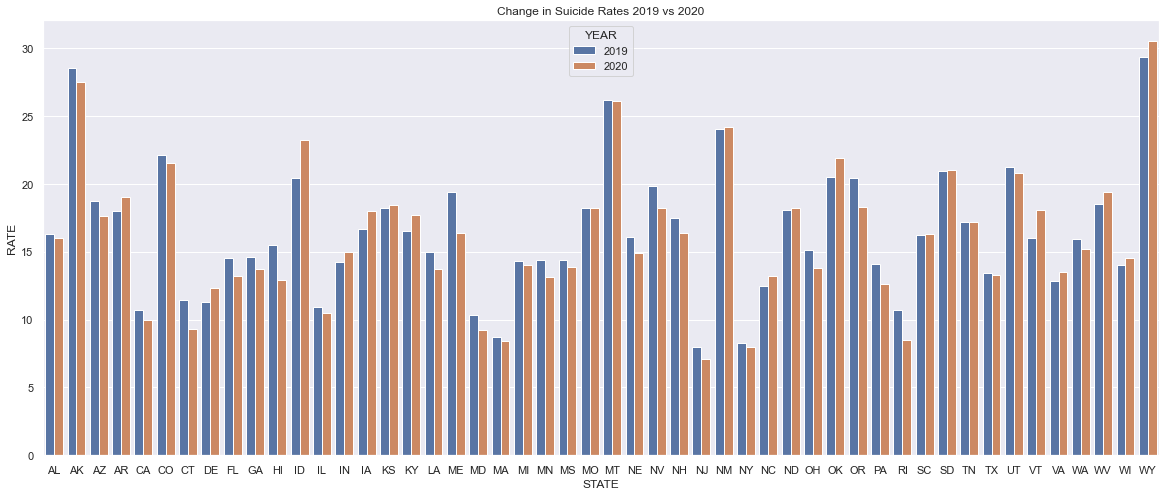

In [76]:
#Reconfigure plot size
sns.set(rc = {'figure.figsize':(20,8)})

#Barplot suicide rate (per population 100,000) vs. state
ax = sns.barplot(data = suicide_data, x='STATE', y='RATE', hue='YEAR').set(title='Change in Suicide Rates 2019 vs 2020')

This was somewhat informative, but we could do better. While we can see how suicide rates changed between 2019 and 2020, it's not visually obvious. 

Our next visualization aims to make it visually obvious. It compares 2019 to 2020 by finding the net change of suicide rates between the years. It's once again a bar graph, but this time, it is plotting the change between the years instead of the rates in each year. It visually shows whether the suicide rates increased or decreased between 2019 and 2020, and by how much they changed. Once again, this graph is sorted alphabetically by state. 

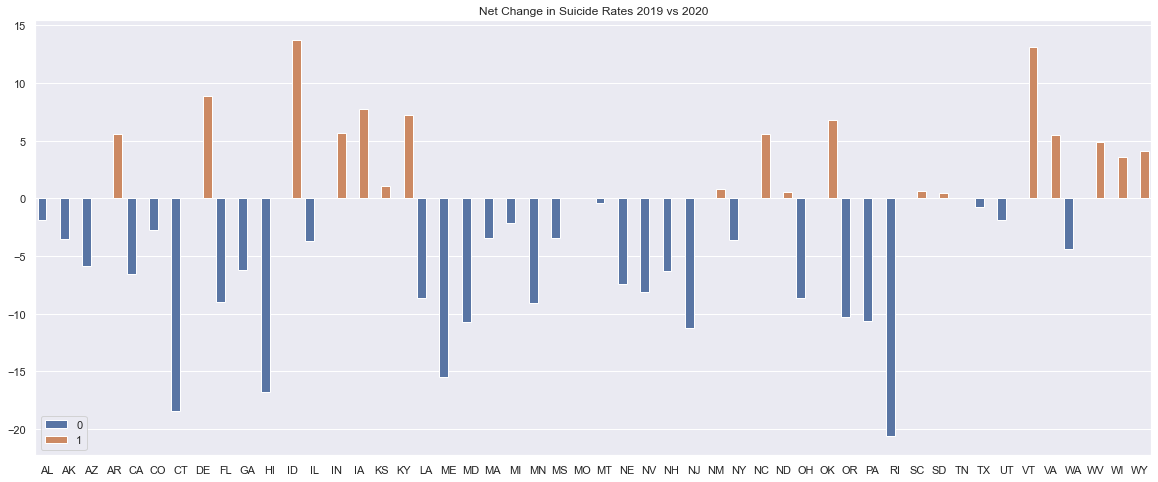

In [77]:
#Find and plot the net change of suicide rates per state

#Dictionary of net changes in suicide 2019 vs. 2020: (key,value) -> (state abbreviation, net change)
rate_change = {}

#Get list of states
states = list(suicide_data['STATE'].unique())

#Loop through all states
for state in states:

    #Grab current suicide rate for 2020
    current = suicide_data[(suicide_data['STATE'] == state) & (suicide_data['YEAR'] == 2020)]
    #Grab previous suicide rate for 2019
    previous = suicide_data[(suicide_data['STATE'] == state) & (suicide_data['YEAR'] == 2019)]

    #Convert to numpy
    current_rate = current['RATE'].to_numpy()[0]
    previous_rate = previous['RATE'].to_numpy()[0]

    #Calculate net change
    net_change = ((current_rate - previous_rate) / (previous_rate)) * 100

    #Add net change to dictionary
    rate_change[state] = net_change


keys = list(rate_change.keys())
vals = [float(rate_change[k]) for k in keys]

#Set colors
colors = [1 if c >= 0 else 0 for c in vals]
#Plot barplot of net changes per state
sns.barplot(x=keys, y=vals, hue=colors,).set(title='Net Change in Suicide Rates 2019 vs 2020');

In the above bar graph, we can see the net changes in **suicide rates** per state. Orange indicates a positive value, meaning a rise in suicides from 2019 to 2020. The blue indicates a negative value, or a decline in suicides from 2019 to 2020. We can already start to see that a majority of suicide rates per state had a negative net change in suicide rates,  meaning more states had a decline rather than an incline.

### Suicide Deaths 2019 vs. 2020

Additionally, we can also compare total number of suicide deaths per state. To see a visualization of suicide deaths per state, we decided to use heat maps (choropleths) to visualize state by state data. The following are density maps by state. <br>
We're using the first of such maps to analyze the number of suicides in 2019 by state. 

In [78]:
# Number of suicides in 2019 by state

fig2019 = px.choropleth(overall_states_data,
                   locations='states abreviated', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2019 suicides',
                    color_continuous_scale="Viridis_r", 
                    )
fig2019.update_layout(
      title_text = 'Suicides in 2019 by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig2019.show()

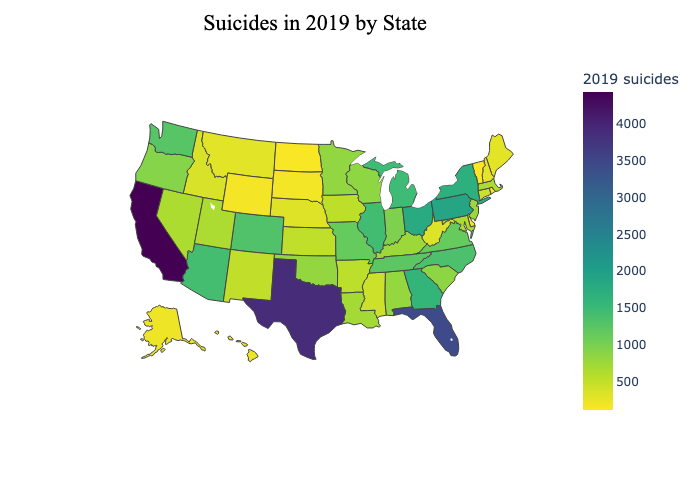

In [79]:
# above is an interactive plot only seen when running the code,
# here below is a static image of that interactive plot
img_19 = fig2019.to_image(format="png")
Image(img_19)

In [80]:
# Number of suicides in 2020 by state

fig2020 = px.choropleth(overall_states_data,
                   locations='states abreviated', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2020 suicides',
                    color_continuous_scale="Viridis_r", 
                    )
fig2020.update_layout(
      title_text = 'Suicides in 2020 by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig2020.show()

We did the same for suicide deaths in 2020.

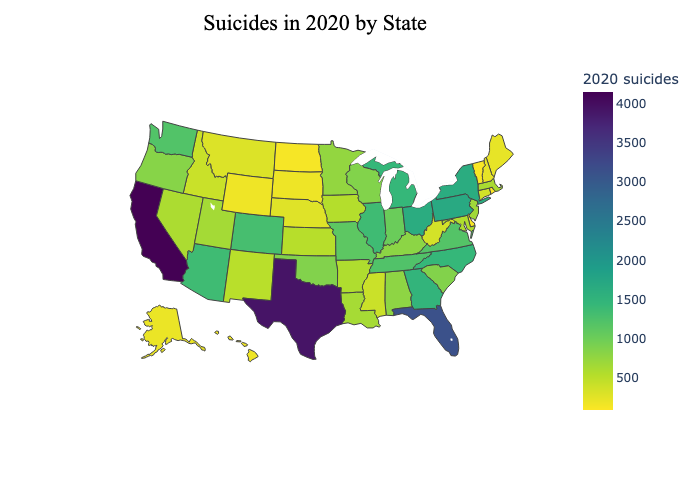

In [81]:
# above is an interactive plot only seen when running the code,
# here below is a static image of that interactive plot
img_20 = fig2020.to_image(format="png")
Image(img_20)

We can can now generate the same barplot that we did for looking at suicide rates, but instead looking at suicide deaths. Again, they are sorted by year, and by state alphabetically. 

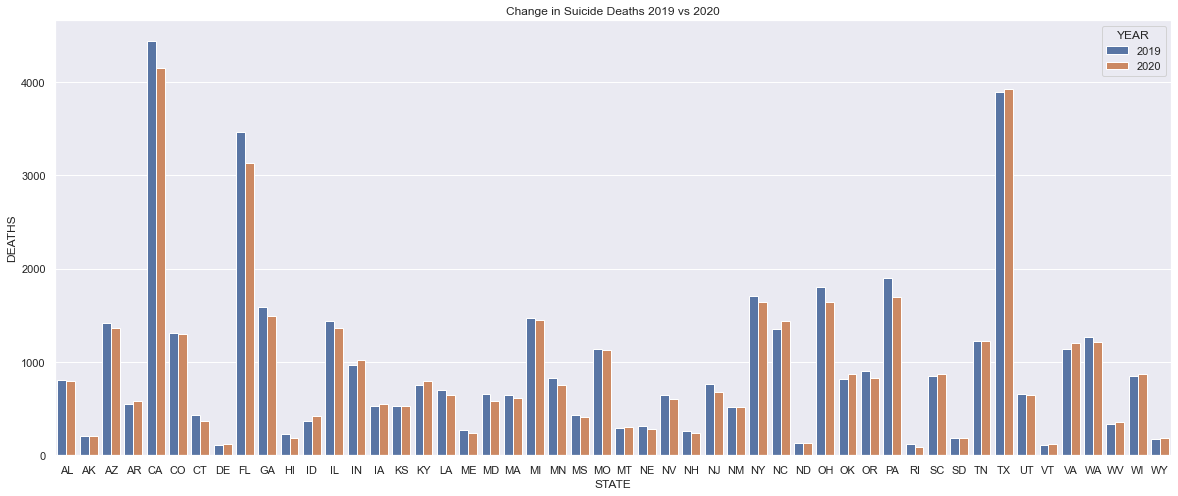

In [82]:
#Barplot total number of suicide deaths vs. state
sns.barplot(data = suicide_data, x='STATE', y='DEATHS', hue='YEAR').set(title='Change in Suicide Deaths 2019 vs 2020');

Once again, we decided to make another bar graph that describes the net change of suicide deaths per state so we could more clearly visualize how the deaths changed between the two years. 

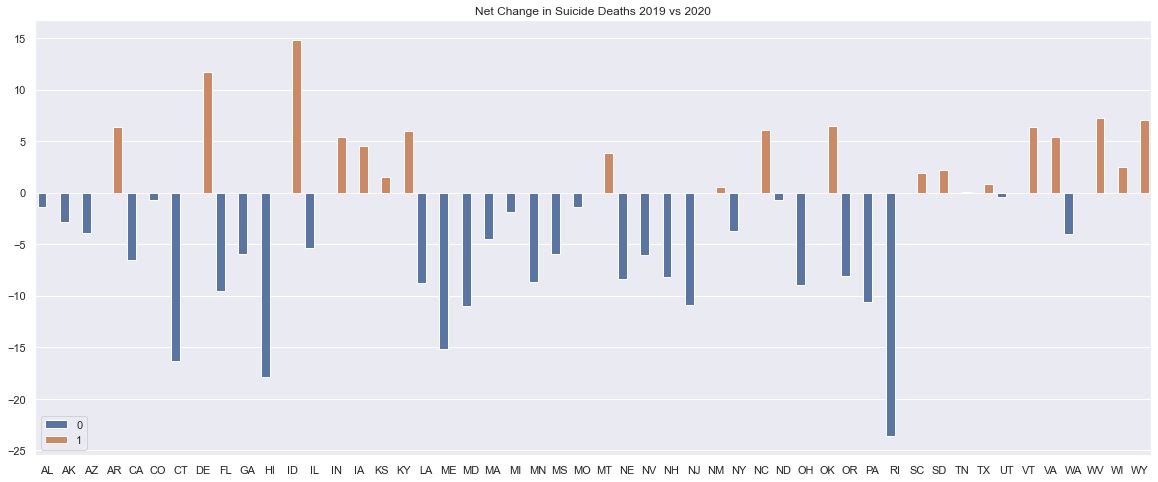

In [83]:
#Find and plot the net change of suicide deaths per state

#Dictionary of net changes in suicide 2019 vs. 2020: (key,value) -> (state abbreviation, net change)
rate_change = {}

#Get list of states
states = list(suicide_data['STATE'].unique())

#Loop through all states
for state in states:

    #Grab current suicide rate for 2020
    current = suicide_data[(suicide_data['STATE'] == state) & (suicide_data['YEAR'] == 2020)]
    #Grab previous suicide rate for 2020
    previous = suicide_data[(suicide_data['STATE'] == state) & (suicide_data['YEAR'] == 2019)]

    #Convert to numpy
    current_rate = current['DEATHS'].to_numpy()[0]
    previous_rate = previous['DEATHS'].to_numpy()[0]

    #Calculate net change
    net_change = ((current_rate - previous_rate) / (previous_rate)) * 100

    #Add net change to dictionary
    rate_change[state] = net_change


keys2 = list(rate_change.keys())
vals2 = [float(rate_change[k]) for k in keys]

#Set colors
colors = [1 if c >= 0 else 0 for c in vals2]
#Plot barplot of net changes per state
sns.barplot(x=keys2, y=vals2, hue=colors,).set(title='Net Change in Suicide Deaths 2019 vs 2020');

Similarily to the net change bar plot above, here we see the net changes in **suicide deaths** per state. Orange indicates a positive value, meaning a rise in suicide deaths from 2019 to 2020. The blue color indicates a negative value, or a decline in suicides from 2019 to 2020. Similar to our net change barplot for our suicide rates, we can also see that more states had a decline in suicide deaths rather than an increase in suicide deaths.

### COVID-19 Rates by State

Our final individual analysis was for the COVID-19 rates in each state. We began by using the overall_states_data dataframe to create a simple barplot of the COVID-19 cases in each state in the year 2020.

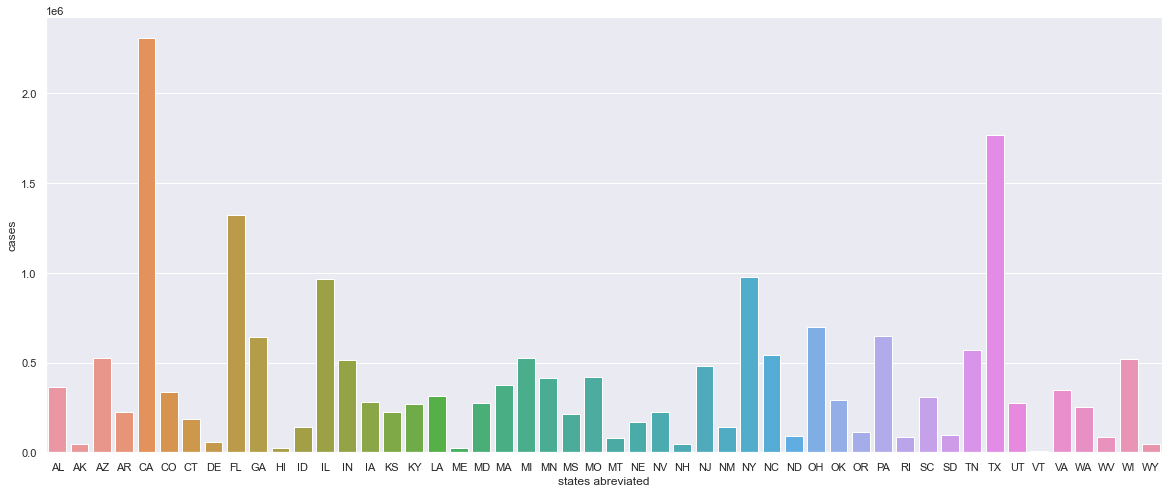

In [84]:
# plot total COVID-19 cases in 2020 by state
covid2020_states = sns.barplot(data = overall_states_data, x='states abreviated', y='cases')

Next, we wanted to visualize the number of COVID-19 deaths in each state in the year 2020. We once again used a barplot to visualize this. 

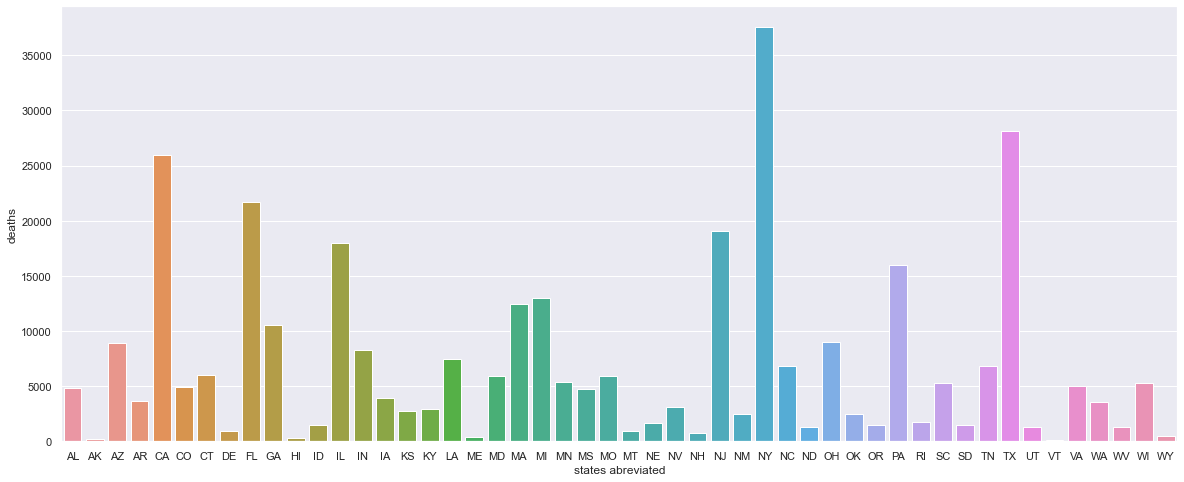

In [85]:
# plot total COVID-19 deaths in 2020 by state

covid2020_states = sns.barplot(data = overall_states_data, x='states abreviated', y='deaths')

And finally, we visualized the length of each state's lockdown in 2020 by using a bargraph. 

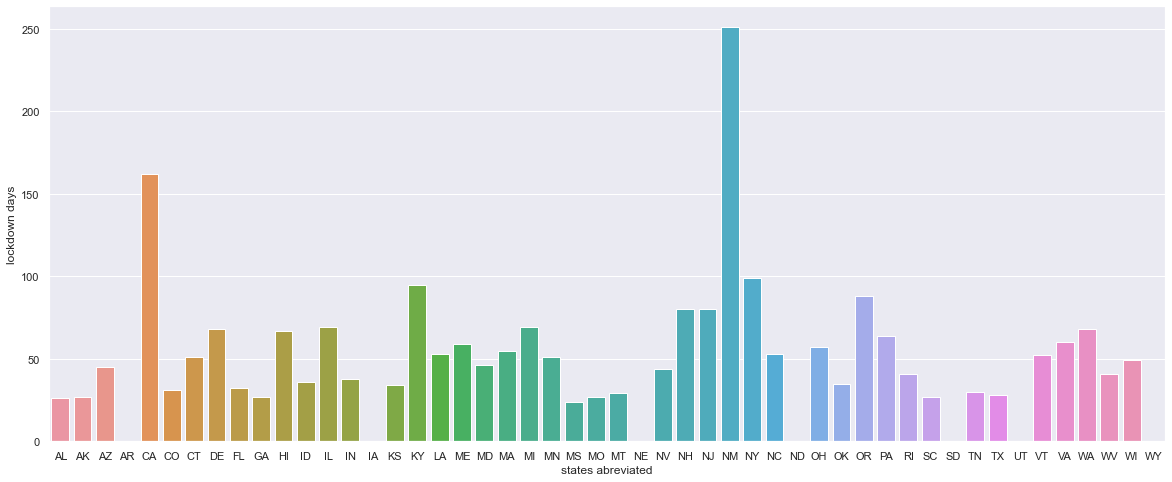

In [86]:
covid2020_state_lockdown = sns.barplot(data = overall_states_data, x='states abreviated', y='lockdown days')

With these initial visualizations, we were better able to picture the information relevant for our analyses. Now, we were ready to compare suicide rates and deaths with our various COVID-19 factors.

## Regression Analysis: Part 1 Suicide Rates

For this part of our data analysis, we want to analyze if there were any correlations with **suicide rates** with any COVID-19 factors (including lockdown length, cases, and deaths) per state. For this analysis, compare the different factors with the **net change in suicide rates** per state

To begin this analysis, we compared the total number of covid cases to the net change in suicide rates per state with our first regression plot. Additionally, we print the slope of our line which is -5658.23.

[[-5658.22929786]]


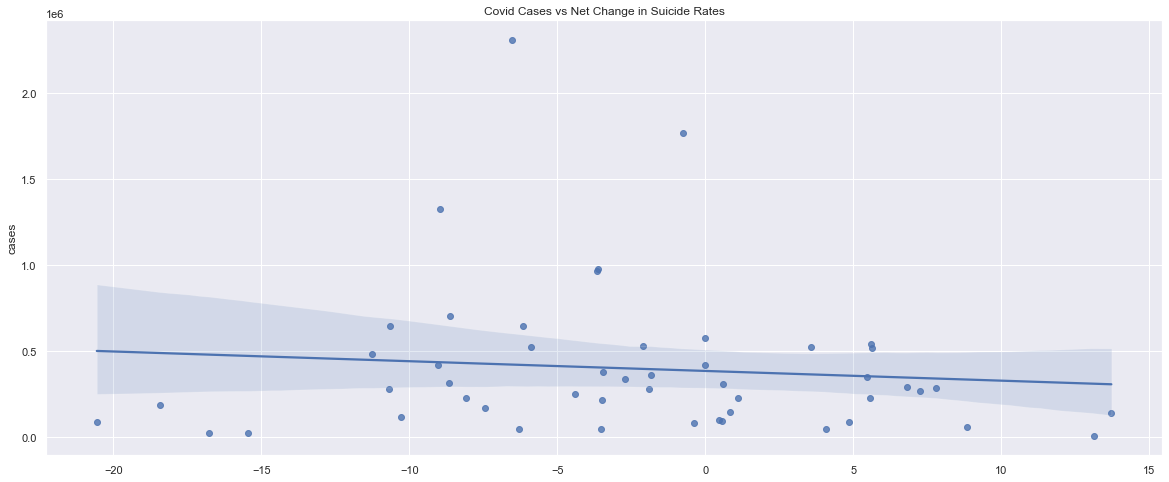

In [87]:
#Plot relationship between state's total number of covid cases vs net change in suicide rates
regplt = sns.regplot(x=vals, y=overall_states_data['cases']).set(title='Covid Cases vs Net Change in Suicide Rates');

#Print our slope
regr = linear_model.LinearRegression()
X = np.array(vals)
Y = np.array(overall_states_data['cases'])
regr.fit(X.reshape(-1,1),Y.reshape(-1,1))
print(regr.coef_)

The next variable we wanted to test our regression plot with is covid deaths. We plotted a regression model for covid deaths vs. net change in suicide rates. We can also see we get a slope of -191.61.

[[-191.61784781]]


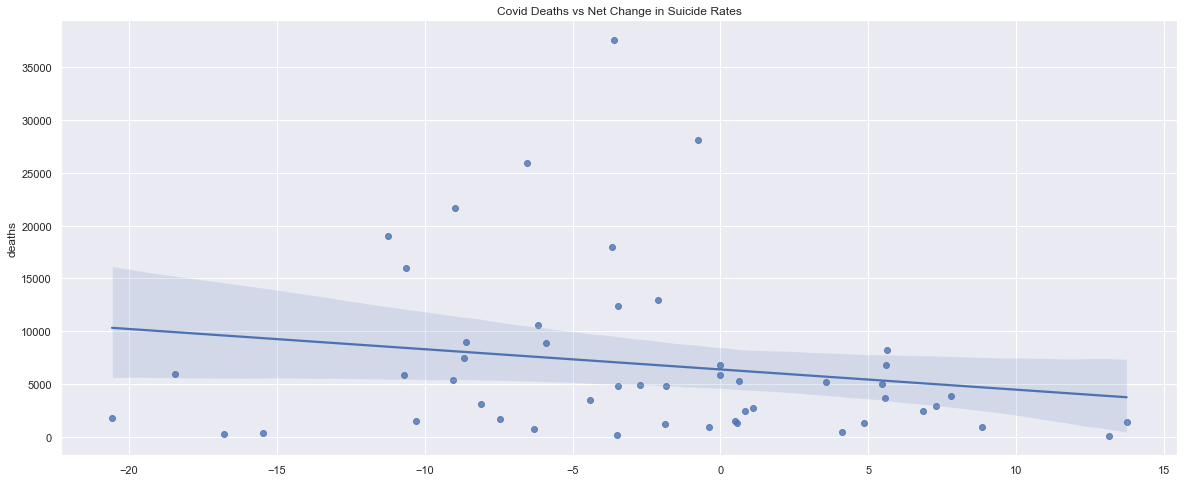

In [88]:
#Plot relationship between state's total number of deaths vs net change in suicide rates
sns.regplot(x=vals, y=overall_states_data['deaths']).set(title='Covid Deaths vs Net Change in Suicide Rates');

regr = linear_model.LinearRegression()
X = np.array(vals)
Y = np.array(overall_states_data['deaths'])
regr.fit(X.reshape(-1,1),Y.reshape(-1,1))
print(regr.coef_)

Finally, the last variable we wanted to test our regression plot with is total amount lockdown days. We plotted a regression model for lockdown days vs. net change in suicide rates. We can also see our slope is -0.707.

[[-0.7070177]]


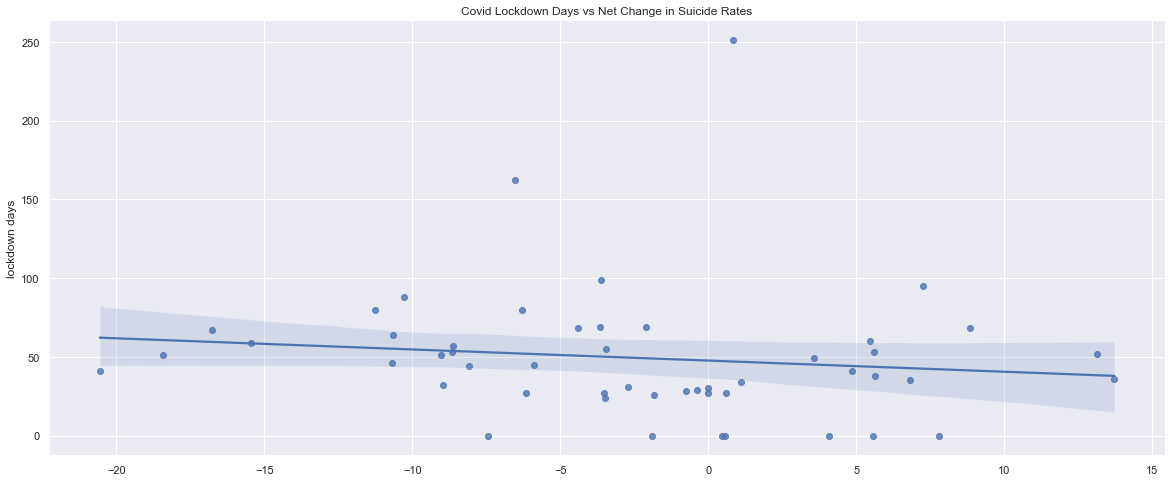

In [89]:
#Plot relationship between state's length of covid lockdown vs net change in suicide rates
sns.regplot(x=vals, y=overall_states_data['lockdown days']).set(title='Covid Lockdown Days vs Net Change in Suicide Rates');

regr = linear_model.LinearRegression()
X = np.array(vals)
Y = np.array(overall_states_data['lockdown days'])
regr.fit(X.reshape(-1,1),Y.reshape(-1,1))
print(regr.coef_)

Looking at all 3 of our regression plots, surprisingly, we can see that all regression plots have no correlation between our variables with the net change in suicide rates. Additionally, a reader might even view them as having a slight negative correlation. We leave this interpretation up to the reader. However, this still proves our hypothesis wrong in which we hypothesized a positive correlation. 

## Regression Analysis: Part 2 Suicide Deaths

For this part of our data analysis, we want to analyze if there were any correlations with **suicide deaths** with any COVID-19 factors (including lockdown length, cases, and deaths) per state. For this analysis, compare the different factors with the **net change in suicide deaths** per state

To begin part 2 of our analysis, we compared the total number of covid cases to the net change in suicide deaths per state with our first regression plot. Additionally, we can see our slope is approximately -5525.60.

[[-5525.59327318]]


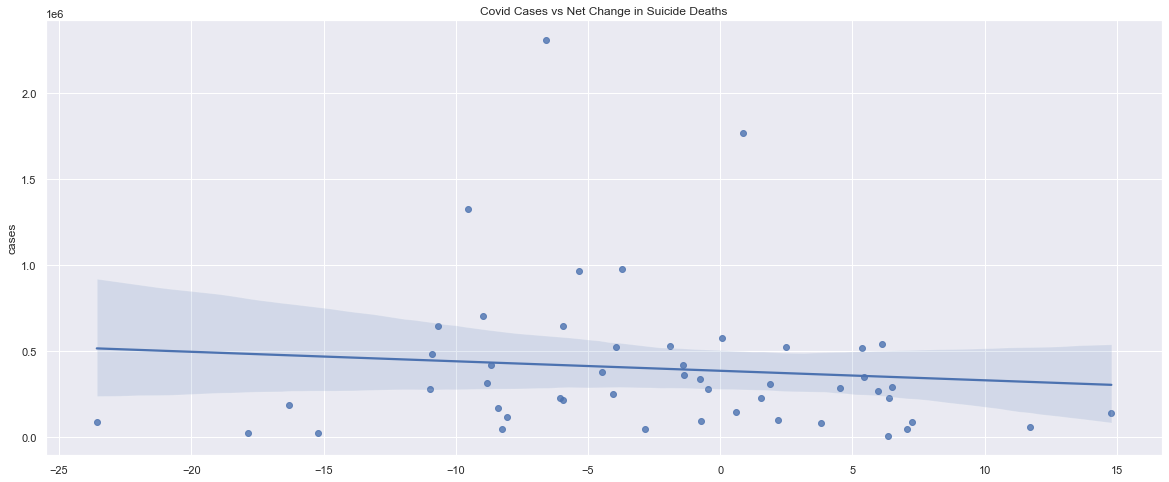

In [90]:
#Plot relationship between state's total number of covid cases vs net change in suicide deaths
sns.regplot(x=vals2, y=overall_states_data['cases']).set(title='Covid Cases vs Net Change in Suicide Deaths');

regr = linear_model.LinearRegression()
X = np.array(vals2)
Y = np.array(overall_states_data['cases'])
regr.fit(X.reshape(-1,1),Y.reshape(-1,1))
print(regr.coef_)

The next variable we wanted to test our regression plot with is covid deaths. We plotted a regression model for covid deaths vs. net change in suicide deaths. We can also see that our slope is -191.62.

[[-191.61784781]]


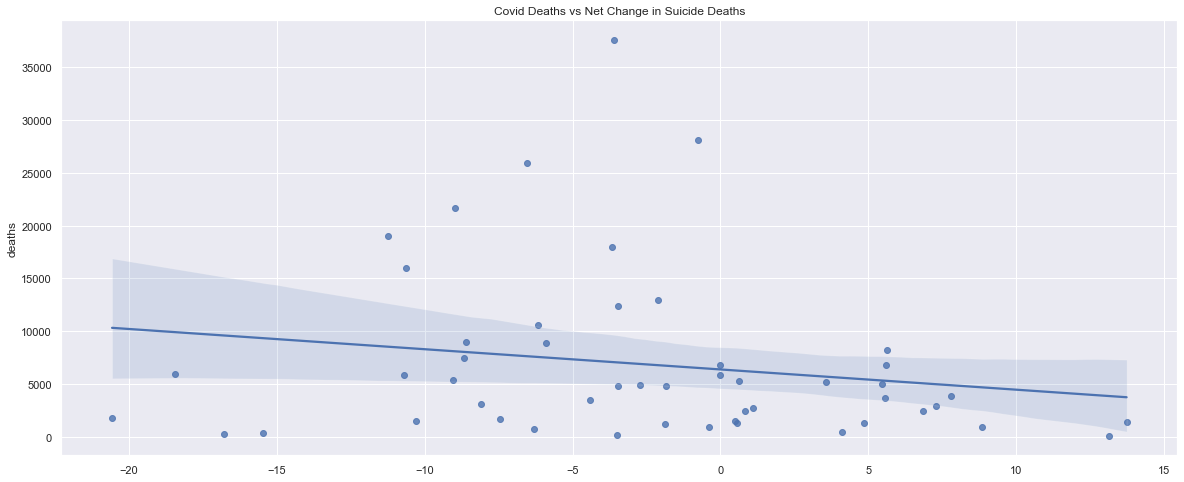

In [91]:
#Plot relationship between state's total number of deaths vs net change in suicide deaths
sns.regplot(x=vals, y=overall_states_data['deaths']).set(title='Covid Deaths vs Net Change in Suicide Deaths');

regr = linear_model.LinearRegression()
X = np.array(vals)
Y = np.array(overall_states_data['deaths'])
regr.fit(X.reshape(-1,1),Y.reshape(-1,1))
print(regr.coef_)

Lastly, we wanted to view total amount of lockdown days with net change in suicide deaths with the following regression plot with a slope of -0.784.

[[-0.78420017]]


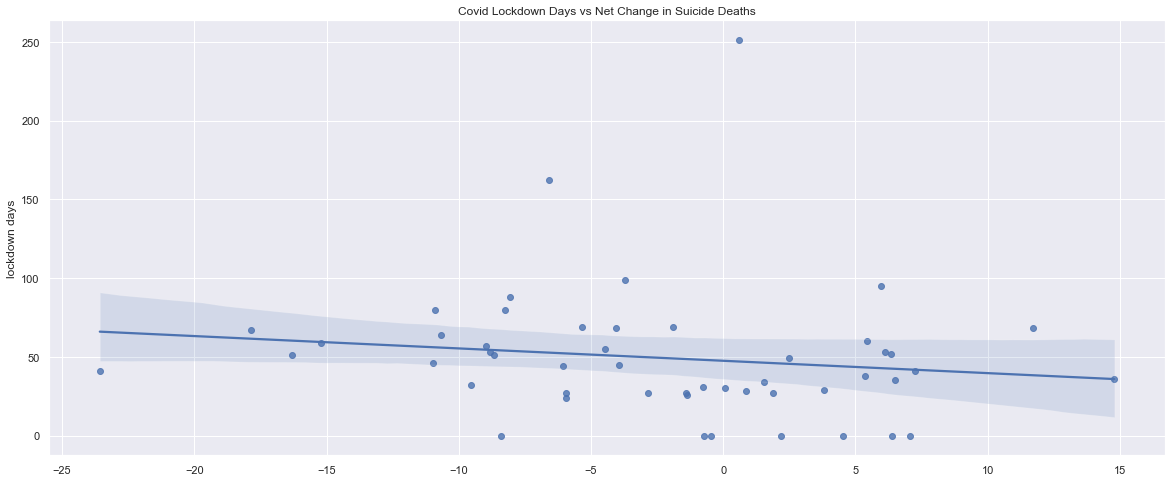

In [92]:
#Plot relationship between state's length of covid lockdown vs net change in suicide deaths
sns.regplot(x=vals2, y=overall_states_data['lockdown days']).set(title='Covid Lockdown Days vs Net Change in Suicide Deaths');

regr = linear_model.LinearRegression()
X = np.array(vals2)
Y = np.array(overall_states_data['lockdown days'])
regr.fit(X.reshape(-1,1),Y.reshape(-1,1))
print(regr.coef_)

Looking at all 3 of our regression plots, similar to part 1, we can also see that they all have no correlation between our variables with the net change in suicide deaths. As mentioned before, a reader can also interpret it as a slight negative corrleation. Similarily to part 1 however, this also shows that our hypothesis is still wrong.

## Regression Analysis: Conclusions

So what does our regression analysis tell us? Essentially, our hypothesis was that we suspected that there would be some correlation (more of like a positive correlation) with covid rates and covid deaths in the United States with our different variables per state (lockdown length, covid cases, covid deaths). Given the results of our regression analysis however, we can see that our results do not support our data since the correlation between our data is little to none. So does this mean our hypothesis is 100% wrong? Not necessarily. We will look into further observations and reasonings to why our data might have not supported our data in the conclusion.

## Data Synthesis

Additionally, we can view the ratio of suicides by state to see that there were less suicides in a majority of states in 2020.

In [93]:
# Ratio of (Number of suicides in 2020) / (Number of suicides in 2019) by state

# Greater than 1 means that there were more suicides in 2020

figyr = px.choropleth(overall_states_data,
                   locations='states abreviated', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2020 to 2019 suicides',
                    color_continuous_scale="Viridis_r", 
                    )
figyr.update_layout(
      title_text = 'Comparing Suicides in 2020 and 2019 by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
figyr.show()

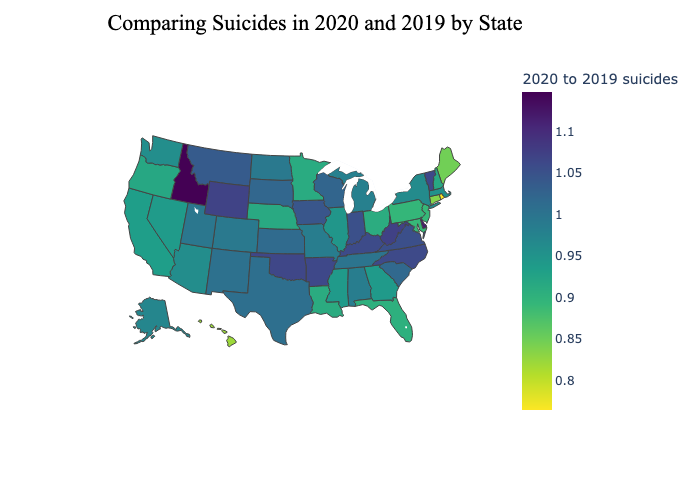

In [94]:
# above is an interactive plot only seen when running the code,
# here below is a static image of that interactive plot
img_yr = figyr.to_image(format="png")
Image(img_yr)

Finally, we compared the ratio of suicides to the total deaths in a state. 

Note: For this map, some percentages are greater than 100. This is because it combines data from two different datasets sorted by state. 

In [95]:
# COMPARING RATIO OF (SUICIDES) / (TOTAL DEATHS)

figratio = px.choropleth(overall_states_data,
                   locations='states abreviated', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='suicide to death percentage',
                    color_continuous_scale="Viridis_r", 
                    )
figratio.update_layout(
      title_text = 'Percentage of Deaths that were Suicide in 2020 by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
figratio.show()

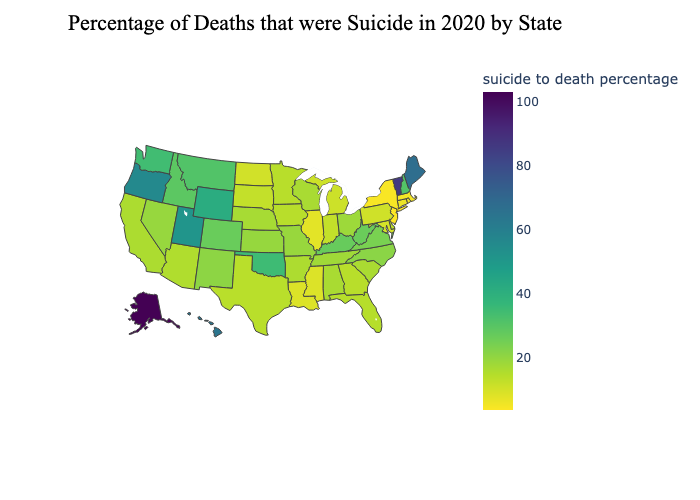

In [96]:
# above is an interactive plot only seen when running the code,
# here below is a static image of that interactive plot
img_ratio = figratio.to_image(format="png")
Image(img_ratio)

And finally, we look for correlation between the number of suicide deaths and COVID-19 factors, especially the length of each state's lockdown. To do this, we look at another heat map.

In [97]:
# COMPARING RATIO OF (SUICIDES) / (LOCKDOWN DAYS)

figstl = px.choropleth(overall_states_data,
                   locations='states abreviated', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='suicide to lockdown days normalized',
                    color_continuous_scale="Viridis_r", 
                    )
figstl.update_layout(
      title_text = 'Suicides per Lockdown Days Normalized (in 2020)',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
figstl.show()

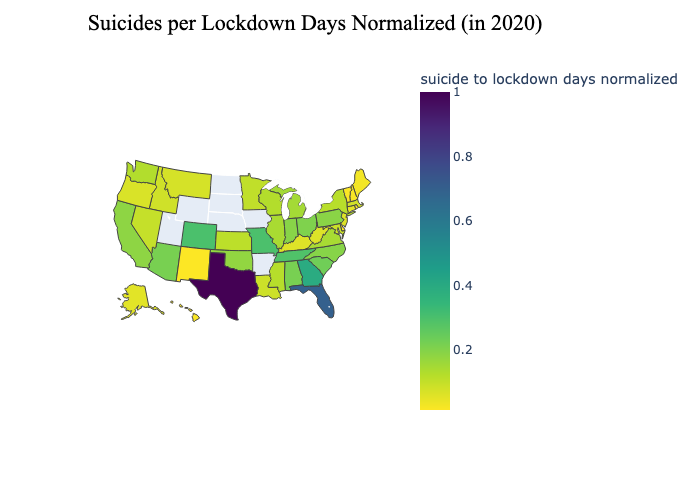

In [98]:
# above is an interactive plot only seen when running the code,
# here below is a static image of that interactive plot
img_stl = figstl.to_image(format="png")
Image(img_stl)

As we can see, some of these states do not show a color. We suspected this is because they didn't have a lockdown.

In [99]:
overall_states_data.loc[overall_states_data['lockdown days'] == 0]

,index,state,date,cases,deaths,lockdown days,states abreviated,2019 suicides,2020 suicides,2020 to 2019 suicides,suicide to death percentage,suicide to lockdown days normalized
3,1225,Arkansas,2020-12-31,225138,3676,0,AR,548.0,583.0,1.063869,15.859630,inf
14,5205,Iowa,2020-12-31,281712,3891,0,IA,528.0,552.0,1.045455,14.186584,inf
26,8843,Nebraska,2020-12-31,167795,1690,0,NE,309.0,283.0,0.915858,16.745562,inf
33,10955,North Dakota,2020-12-31,92502,1299,0,ND,136.0,135.0,0.992647,10.392610,inf
40,13640,South Dakota,2020-12-31,99164,1488,0,SD,182.0,186.0,1.021978,12.500000,inf
43,14577,Utah,2020-12-31,276612,1270,0,UT,654.0,651.0,0.995413,51.259843,inf
49,16733,Wyoming,2020-12-31,44409,438,0,WY,170.0,182.0,1.070588,41.552511,inf


Our suspicion was right. The states that do not have data on the heatmap are those that did not have a lockdown. We decided to ignore these states and look for correlations in the rest.

As we can  see (since the numbers don't follow a pattern/aren't uniform), there once again appears to be no correlation between the COVID-19 factor and the number of suicides in a state. 

With this, we conclude our analysis of our data.


# Ethics & Privacy

Regarding the privacy of our datasets: One of our datasets is brought to us by the CDC. According to an article on their website, they compile their data through agreements made with the 50 states in the US and 3000+ local jurisdictions. Each entity has their own policy and agreements with the CDC. If we look at the CDC dataset there's no mention of individual names or identification, so in terms of privacy this checks all the boxes. Further, we also used a dataset containing information collected by the New York Times. A dive into the specifics of this dataset show that this information was compiled based on reports by state and local health agencies. If we take a glance at the dataset itself there are no forms of identification of individuals, which again checks the boxes for not violating privacy.

In terms of the ethics of our posed question and the data we retrieved: We believe that our question is non-hurtful and one based in pure curiosity and for the purposes of education. The information in our project was compiled by large, credible bodies using officiated, objective data. This means that there was no room for lying in our dataset. 

One concern we have is that the result of our project might clash with the increased light shed on mental health issues in recent times. The result of our project suggests that there was not an increase in suicide rates due to a prolonged pandemic and time away from normalcy. We would like to stress that this project does not provide the end-all-be-all for mental health issues derived from the pandemic! The effects of the pandemic, in regards to mental health, may not fully manifest until years after the data for this research was compiled. Further, many individuals may face increased rates of mental health issues but it may never reach the point of suicide, that is a crucial distinction to make!

# Conclusion & Discussion

The goal of our project was to answer the question: Have there been more suicides in recent times due to the Covid-19 lockdowns and did different Covid-19 factors per state such as the amount of lockdown days, covid cases, and covid deaths affect it? Our results found that there was not a correlation between any of the those 3 factors with the change in suicide rates and deaths from 2019 vs 2020. In our project we included multiple interactive heat maps that show the ratio of suicides per death in each state and the comparisons between suicides from 2019 to 2020. Furthermore, we also included easy to comprehend bar plots that depict similar data as the heat maps. Most importantly, we used a method of linear regression plots in order to answer our research question. Using data about how long the lockdowns were in each state, total number of covid cases, and total amount of covid cases in corespondance with suicide rates and deaths per state, we were able to formulate our regression plots and test our hypothesis.

So why was our hypothesis wrong according to our data analysis? It should be pointed out that our datasets only covered data from 2020 when the pandemic started. More extensive research into the years following the start of the pandemic going into 2021 may suggest different results that may formulate more closely with our original hypothesis, especially because many states went into multiple lockdowns in 2021, which could have possibly affected our results. As noted in the Ethics & Privacy section, mental health is a pervasive issue that doesn't always manifest itself immediately. These issues may go unnoticed and can further plague individuals for years later on, hence why we conclude that making more observations into 2021 and maybe even the start of 2022 may have the potential to yield a different outcome. Additionally, it may also be noteworthy to mention that public resources for mental health for fighting depression, anxiety, suicide etc. in the country may have increased at the start of the pandemic. Considering these factors might also affect why we saw a decline in suicide from the timeline we observed and why little to no correlation was observed in which the point of our research was to figure out if there was an immediate effect as a result of society's retraction from the norm.

# Team Contributions

- Kyle Batalla - Provided datasets, aided in providing code for data cleaning, and aided in providing code and various seaborn visualizations for data analysis such as barplots, and regression plots and sklearn calculations.
- Ken Nguyen - Compiled preliminary data, aided in setup, and wrote sections: Conclusion, ethics & privacy, overview, background & prior work.
- Brian Chu - Cleaned and researched datasets, provided code for installing packages and imports, aided in data cleaning, wrangling, and density heatmaps for visualization.
- Ishika Rathi - aided in data cleaning, did "COVID-19 Rates by State", edited structure to increase narrative flow, wrote research question & hypothesis, and made slideshow for video.